# EGT305 Big Data Assignment - Developed & Created by Sai Keerthan (232594T)

**Business Context**:
Government organisation would like to know the status of the job market in the country. 

**Project Objectives**:
Tasked me with: 
1. exploring the data from a survey and provide findings to the government organisation
2. Building a ML Model to predict the salary of a person based on his features. 

**Dataset Provided**:
1. `Employee_dataset.csv`
2. `Employee_salaries.csv`

## Import Packages:

In [4]:
# system level imports
import sys
import os

# data manipulation and visualization libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # might not use due to size of the dataset

# modelling | Machine Learning libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import xgboost as xgb
# --------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor


# supress any warnings
import warnings

warnings.filterwarnings("ignore") # filter out the warnings


## Initialise the CWD and Dataset Paths

In [2]:
# get the current working directory and print it out 

print(f"Current Working Directory: {os.getcwd()}")

Current Working Directory: /Users/saikeerthan/NYP-AI/Year3/Big_Data/third_assignment


In [3]:
# instantiate both the dataset paths 

employee_df = os.path.join(os.getcwd(), "Employee_dataset.csv")
salary_df = os.path.join(os.getcwd(), "Employee_salaries.csv")

In [4]:
if employee_df and salary_df:
    print(f"Employee Dataset Path: {employee_df}")
    print(f"Salary Dataset Path: {salary_df}")
else:
    print("Dataset paths are not set correctly.")

Employee Dataset Path: /Users/saikeerthan/NYP-AI/Year3/Big_Data/third_assignment/Employee_dataset.csv
Salary Dataset Path: /Users/saikeerthan/NYP-AI/Year3/Big_Data/third_assignment/Employee_salaries.csv


The dataset paths have been correctly instantiated, we will now proceed onto the preliminary Data Exploration

## Non-PySpark Data Cleaning & Modelling:

### Exploratory Data Analysis

In [5]:
# allow pandas to read df 
employee_df = pd.read_csv(employee_df)
salary_df = pd.read_csv(salary_df)

In [6]:
# show employee df 

employee_df

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5.0


In [7]:
# show the data about the employee df 

print("Current size of the Employee Dataset: ", employee_df.shape)
print("\n")
print("Current Dtypes of the Employee Dataset: \n", employee_df.dtypes)
print("\n")

Current size of the Employee Dataset:  (1000000, 8)


Current Dtypes of the Employee Dataset: 
 jobId               object
companyId           object
jobRole             object
education           object
major               object
industry            object
yearsExperience    float64
distanceFromCBD    float64
dtype: object




We will do the same for `Employee_salaries.csv`

In [8]:
salary_df

,jobId,salaryInThousands
0,JOB1362684407687,130.0
1,JOB1362684407688,101.0
2,JOB1362684407689,137.0
3,JOB1362684407690,142.0
4,JOB1362684407691,163.0
...,...,...
999995,JOB1362685407682,88.0
999996,JOB1362685407683,160.0
999997,JOB1362685407684,64.0
999998,JOB1362685407685,149.0


In [9]:
# show the data about the employee df 

print("Current size of the Salary Dataset: ", salary_df.shape)
print("\n")
print("Current Dtypes of the Salary Dataset: \n", salary_df.dtypes)
print("\n")

Current size of the Salary Dataset:  (1000000, 2)


Current Dtypes of the Salary Dataset: 
 jobId                 object
salaryInThousands    float64
dtype: object




We will have to merge the datasets together, however, before we merge, we will clean each data individually, and then merge together as we do not want to bring out the unclean data and merge them together. The process will flow like this: 

1. Basic Cleaning for each dataset first 
2. More complicated cleaning (if needed) on the merged dataset. 

### Data Cleaning

#### `Employee_dataset.csv`

#### Missing Values & Duplicates

In [10]:
# print out the missing values in the employee df
print("Missing Values in Employee Dataset: \n", employee_df.isnull().sum())
print("\n")
print(f"Sum of the missing values in the Employee Dataset: {employee_df.isnull().sum().sum()}")

Missing Values in Employee Dataset: 
 jobId              105
companyId          148
jobRole            165
education          186
major              207
industry           214
yearsExperience    198
distanceFromCBD    166
dtype: int64


Sum of the missing values in the Employee Dataset: 1389


In [11]:
# calculate the percentage of missing values against the entire size of the df 
missing_percentage = (employee_df.isnull().sum() / employee_df.shape[0]) * 100
print("Percentage of Missing Values in Employee Dataset: \n", missing_percentage)

Percentage of Missing Values in Employee Dataset: 
 jobId              0.0105
companyId          0.0148
jobRole            0.0165
education          0.0186
major              0.0207
industry           0.0214
yearsExperience    0.0198
distanceFromCBD    0.0166
dtype: float64


Since the loss of data is negligible, we will drop these missing values 

In [12]:
# drop missing values in employee df 
employee_df.dropna(inplace=True)

# print out the missing values in the employee df after dropping the missing values
print("Missing Values in Employee Dataset after dropping: \n", employee_df.isnull().sum())
print("\n")
print(f"Sum of the missing values in the Employee Dataset after dropping: {employee_df.isnull().sum().sum()}")

Missing Values in Employee Dataset after dropping: 
 jobId              0
companyId          0
jobRole            0
education          0
major              0
industry           0
yearsExperience    0
distanceFromCBD    0
dtype: int64


Sum of the missing values in the Employee Dataset after dropping: 0


The dataset now does not have any missing values, we will no move onto seeing if there are any duplicates

In [13]:
# check for duplicates in the employee df
duplicates = employee_df.duplicated().sum()
print(f"Number of duplicate rows in the Employee Dataset: {duplicates}")

Number of duplicate rows in the Employee Dataset: 0


In [14]:
employee_df

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0
10,JOB1362684407697,COMP56,JANITOR,HIGH_SCHOOL,NONE,HEALTH,24.0,30.0
11,JOB1362684407698,COMP7,CEO,MASTERS,PHYSICS,EDUCATION,7.0,79.0
12,JOB1362684407699,COMP4,JUNIOR,NONE,NONE,OIL,8.0,29.0
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5.0


With this, the basic cleaning has been finished for the `Employee_dataset.csv`, we will now move onto doing the basic cleaning for the `Employee_salaries.csv`

#### `Employee_salaries.csv`

In [15]:
# check for missing values in the salary df
print("Missing Values in Salary Dataset: \n", salary_df.isnull().sum())
print("\n")
print(f"Sum of the missing values in the Salary Dataset: {salary_df.isnull().sum().sum()}")

Missing Values in Salary Dataset: 
 jobId                223
salaryInThousands    229
dtype: int64


Sum of the missing values in the Salary Dataset: 452


In [16]:
# calculate the percentage of missing values against the entire size of the df 
missing_percentage = (salary_df.isnull().sum() / salary_df.shape[0]) * 100
print("Percentage of Missing Values in Employee Dataset: \n", missing_percentage)

Percentage of Missing Values in Employee Dataset: 
 jobId                0.0223
salaryInThousands    0.0229
dtype: float64


Similar to `Employee_dataset.csv`, the percentage is negligible due to the vast amount of data present in the df, therefore it is safe to drop these missing values without risking any data loss or integrity

In [17]:
# drop missing values in salary df 
salary_df.dropna(inplace=True)
# print out the missing values in the salary df after dropping the missing values
print("Missing Values in Salary Dataset after dropping: \n", salary_df.isnull().sum())
print("\n")
print(f"Sum of the missing values in the Salary Dataset after dropping: {salary_df.isnull().sum().sum()}")

Missing Values in Salary Dataset after dropping: 
 jobId                0
salaryInThousands    0
dtype: int64


Sum of the missing values in the Salary Dataset after dropping: 0


Missing values have been removed from the salary df, now it's time to check for duplicates in the salary df 

In [18]:
# check for duplicates in the employee df
duplicates = employee_df.duplicated().sum()
print(f"Number of duplicate rows in the Employee Dataset: {duplicates}")

Number of duplicate rows in the Employee Dataset: 0


Similarly, there is no duplicated values in the Salary df, this concludes basic cleaning for both the datasets

There is still more cleaning do to (Checking for outliers, structural errors), but it is better to merge the dataset first than perform more advanced cleaning. Here is the justification: 

1. Contextual Outlier Detection
	•	Outliers are often only apparent when you have all relevant fields together.
	•	Example: A salary might look reasonable in isolation, but is an outlier when paired with a junior job title or low years of experience.

2. Cross-Feature Consistency Checks
	•	Advanced cleaning often requires comparing values across multiple columns, which may only exist after merging.
	•	Example: Ensuring education level aligns with jobRole or that industry matches salaryInThousands.

3. Category Normalization
	•	Harmonizing category labels (like job roles, majors, industries) is easier once you have the full combined set of categories from both datasets.

4. Avoiding Premature Data Loss
	•	Cleaning before merging can lead to removing data that would otherwise be valid in context.
	•	Example: A value might appear as an outlier in one dataset but is justified when paired with a field from the other dataset.

5. Efficient Error Detection
	•	Structural errors and inconsistencies, such as duplicate jobId rows with conflicting information, become much more visible post-merge.


However, before we merge, there might be some jobIds which are present in `Employee_salaries.csv` which are not present in `Employee_dataset.csv`, therefore it is best we check which jobIds match and then merge because: 

When merging two datasets, it is generally best to keep only those records (rows) where the `jobId` appears in both dataframes. This is typically done using an `inner join`. Here’s why:

- **Ensures Complete Data:**  
  Merging only on matching `jobId`s guarantees that each row in the merged dataset has both employee details and salary information. This leads to a dataset where every record is fully usable for analysis.

- **Prevents Unnecessary Missing Values:**  
  Including rows where the `jobId` is missing from one side introduces missing values (`NaN`) in important columns. These incomplete records add complexity and can lower the quality of subsequent analyses.

- **Simplifies Downstream Processing:**  
  A merged dataset without extraneous missing values is easier to clean, analyze, and use for machine learning.

Therefore, we will now check the matching jobIds

In [19]:
# create sets for both the datasets to check if there are any common columns
salary_ids = set(salary_df['jobId'])
employee_ids = set(employee_df['jobId'])

# find the rows in salary which are not present in employee 
id_in_salary = salary_ids - employee_ids

# present numbers 
print(f"Number of jobIds in Salary Dataset not present in Employee Dataset: {len(id_in_salary)}")

Number of jobIds in Salary Dataset not present in Employee Dataset: 297


In [20]:
# show the rows in salary df which are not present in employee df
salary_not_in_employee = salary_df[salary_df['jobId'].isin(id_in_salary)]
print("Rows in Salary Dataset not present in Employee Dataset: \n", salary_not_in_employee)

Rows in Salary Dataset not present in Employee Dataset: 
                    jobId  salaryInThousands
2       JOB1362684407689              137.0
3       JOB1362684407690              142.0
4       JOB1362684407691              163.0
5       JOB1362684407692              113.0
53      JOB1362684407740              193.0
...                  ...                ...
999809  JOB1362685407496              116.0
999846  JOB1362685407533              104.0
999847  JOB1362685407534              152.0
999848  JOB1362685407535              168.0
999868  JOB1362685407555              129.0

[297 rows x 2 columns]


Since the rows which are in `Employee_salaries.csv` and not in `Employee_dataset.csv` are not so much as compared to the overall size of the salary df, it is safe to drop them

In [21]:
# drops the rows in salary df which are not present in employee df
salary_df = salary_df[~salary_df['jobId'].isin(id_in_salary)]
salary_df = salary_df.reset_index(drop=True)

print("Salary Dataset after dropping rows not present in Employee Dataset: \n", salary_df.head())

Salary Dataset after dropping rows not present in Employee Dataset: 
               jobId  salaryInThousands
0  JOB1362684407687              130.0
1  JOB1362684407688              101.0
2  JOB1362684407697              102.0
3  JOB1362684407698              144.0
4  JOB1362684407699               79.0


In [22]:
salary_df

,jobId,salaryInThousands
0,JOB1362684407687,130.0
1,JOB1362684407688,101.0
2,JOB1362684407697,102.0
3,JOB1362684407698,144.0
4,JOB1362684407699,79.0
...,...,...
999469,JOB1362685407682,88.0
999470,JOB1362685407683,160.0
999471,JOB1362685407684,64.0
999472,JOB1362685407685,149.0


To ensure each record in our merged dataset has both employee details and salary information, we remove salary records whose `jobId` does not exist in the employee dataset. Since this represents a very small fraction of the data, it will not significantly affect our analysis, and helps avoid missing values and incomplete records later on.

We can now join both datasets to have a `master_df.csv`!

In [23]:
master_df = pd.merge(employee_df, salary_df, on='jobId', how='inner')

print("Master Dataset after merging Employee and Salary Datasets: \n", master_df.head())

Master Dataset after merging Employee and Salary Datasets: 
               jobId companyId  jobRole    education    major   industry  \
0  JOB1362684407687    COMP37      CFO      MASTERS     MATH     HEALTH   
1  JOB1362684407688    COMP19      CEO  HIGH_SCHOOL     NONE        WEB   
2  JOB1362684407697    COMP56  JANITOR  HIGH_SCHOOL     NONE     HEALTH   
3  JOB1362684407698     COMP7      CEO      MASTERS  PHYSICS  EDUCATION   
4  JOB1362684407699     COMP4   JUNIOR         NONE     NONE        OIL   

   yearsExperience  distanceFromCBD  salaryInThousands  
0             10.0             83.0              130.0  
1              3.0             73.0              101.0  
2             24.0             30.0              102.0  
3              7.0             79.0              144.0  
4              8.0             29.0               79.0  


In [24]:
# print data about the master df
print("Current size of the Master Dataset: ", master_df.shape)
print("\n")
print("Current Dtypes of the Master Dataset: \n", master_df.dtypes)
print("\n")
master_df

Current size of the Master Dataset:  (999474, 9)


Current Dtypes of the Master Dataset: 
 jobId                 object
companyId             object
jobRole               object
education             object
major                 object
industry              object
yearsExperience      float64
distanceFromCBD      float64
salaryInThousands    float64
dtype: object




,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,101.0
2,JOB1362684407697,COMP56,JANITOR,HIGH_SCHOOL,NONE,HEALTH,24.0,30.0,102.0
3,JOB1362684407698,COMP7,CEO,MASTERS,PHYSICS,EDUCATION,7.0,79.0,144.0
4,JOB1362684407699,COMP4,JUNIOR,NONE,NONE,OIL,8.0,29.0,79.0
...,...,...,...,...,...,...,...,...,...
999469,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94.0,88.0
999470,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35.0,160.0
999471,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81.0,64.0
999472,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5.0,149.0


#### `master_df.csv`

In [25]:
# check for missing values in the master df 
print("Missing Values in Master Dataset: \n", master_df.isnull().sum())
print("\n")
print(f"Sum of the missing values in the Master Dataset: {master_df.isnull().sum().sum()}")

Missing Values in Master Dataset: 
 jobId                0
companyId            0
jobRole              0
education            0
major                0
industry             0
yearsExperience      0
distanceFromCBD      0
salaryInThousands    0
dtype: int64


Sum of the missing values in the Master Dataset: 0


No Missing values in the master dataset, let us now see for duplicates

In [26]:
# duplicates in the master df
print("Number of duplicate rows in the Master Dataset: ", master_df.duplicated().sum())

Number of duplicate rows in the Master Dataset:  0


Basic Cleaning for the Master Dataset is done, we will now move onto printing out the executive summary to perform more complex cleaning (fixing structural errors, outliers)

In [27]:
# print unique summary for master dataset
executive_summary = pd.DataFrame({
    "column": master_df.columns,
    "num_unique": [master_df[c].nunique(dropna=False) for c in master_df.columns],
    "example_values": [master_df[c].unique()[:10] for c in master_df.columns]  # Show first 10 unique values
})
executive_summary

,column,num_unique,example_values
0,jobId,999474,"[JOB1362684407687, JOB1362684407688, JOB136268..."
1,companyId,63,"[COMP37, COMP19, COMP56, COMP7, COMP4, COMP54,..."
2,jobRole,9,"[CFO, CEO, JANITOR, JUNIOR, CTO, VICE_PRESIDEN..."
3,education,5,"[MASTERS, HIGH_SCHOOL, NONE, BACHELORS, DOCTORAL]"
4,major,9,"[MATH, NONE, PHYSICS, BIOLOGY, LITERATURE, CHE..."
5,industry,8,"[HEALTH, WEB, EDUCATION, OIL, FINANCE, AUTO, S..."
6,yearsExperience,25,"[10.0, 3.0, 24.0, 7.0, 8.0, 21.0, 13.0, 1.0, 2..."
7,distanceFromCBD,102,"[83.0, 73.0, 30.0, 79.0, 29.0, 26.0, 81.0, 8.0..."
8,salaryInThousands,281,"[130.0, 101.0, 102.0, 144.0, 79.0, 193.0, 47.0..."


We have printed out the executive summary to gain a overview of the columns and their unique values, now, we will narrow down to clean the most relevant columns first

##### `jobRole` Column Cleaning

In [28]:
# ensure proper capitalisation of the column 
master_df['jobRole'] = master_df['jobRole'].str.lower().str.strip()

master_df['jobRole'].unique()

array(['cfo', 'ceo', 'janitor', 'junior', 'cto', 'vice_president',
       'senior', 'manager', 'president'], dtype=object)

##### Check the Value Distribution

In [29]:
print(master_df['jobRole'].value_counts())

jobRole
senior            125830
vice_president    125168
manager           125062
cto               124986
janitor           124909
ceo               124703
junior            124519
cfo               124296
president              1
Name: count, dtype: int64


The `president` column looks suspicious, as there is so much more entires for `vice_president`, let us investigate

In [30]:
# Display the row(s) with 'president'
master_df[master_df['jobRole'] == 'president']

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
935203,JOB1362685343310,COMP0,president,NONE,NONE,GOVERNMENT,1.0,1.0,81.0


In [31]:
# print out values with COMP0 as companyID in the df 
master_df[(master_df['companyId'] == 'COMP0')]


,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
23,JOB1362684407718,COMP0,cfo,BACHELORS,PHYSICS,HEALTH,18.0,32.0,132.0
216,JOB1362684407924,COMP0,cfo,MASTERS,MATH,EDUCATION,20.0,20.0,180.0
269,JOB1362684407980,COMP0,cfo,DOCTORAL,LITERATURE,EDUCATION,8.0,83.0,101.0
286,JOB1362684407997,COMP0,senior,BACHELORS,CHEMISTRY,EDUCATION,17.0,97.0,86.0
315,JOB1362684408026,COMP0,janitor,HIGH_SCHOOL,NONE,WEB,21.0,1.0,163.0
...,...,...,...,...,...,...,...,...,...
999175,JOB1362685407377,COMP0,ceo,HIGH_SCHOOL,NONE,FINANCE,22.0,32.0,183.0
999184,JOB1362685407386,COMP0,manager,NONE,NONE,OIL,15.0,14.0,104.0
999270,JOB1362685407475,COMP0,vice_president,MASTERS,BUSINESS,EDUCATION,24.0,52.0,131.0
999287,JOB1362685407492,COMP0,janitor,NONE,NONE,WEB,5.0,1.0,82.0


This president entry is very suspicious, as it does not make sense for the president to make lesser money than the vice president, with only one year of experience

In [32]:
# Drop the row where jobRole is 'president'
master_df = master_df[master_df['jobRole'] != 'president']

master_df = master_df.reset_index(drop=True)

In [33]:
# Confirm it's been deleted
print(master_df['jobRole'].unique())
print(master_df['jobRole'].value_counts())

['cfo' 'ceo' 'janitor' 'junior' 'cto' 'vice_president' 'senior' 'manager']
jobRole
senior            125830
vice_president    125168
manager           125062
cto               124986
janitor           124909
ceo               124703
junior            124519
cfo               124296
Name: count, dtype: int64


With that out of the way, let us continue on with finding out even more outliers in the jobRole with specific roles

In [34]:
# Find janitors with unusually high salaries
high_salary_janitors = master_df[(master_df['jobRole'] == 'janitor') & (master_df['salaryInThousands'] > 200)]
print(high_salary_janitors)

Empty DataFrame
Columns: [jobId, companyId, jobRole, education, major, industry, yearsExperience, distanceFromCBD, salaryInThousands]
Index: []


In [35]:

# Find executives (ceo, cfo, cto) with very low yearsExperience
junior_execs = master_df[
    (master_df['jobRole'].isin(['ceo', 'cfo', 'cto'])) &
    (master_df['yearsExperience'] < 2)
]
junior_execs

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
56,JOB1362684407753,COMP15,cto,HIGH_SCHOOL,NONE,WEB,1.0,13.0,96.0
103,JOB1362684407802,COMP44,cfo,HIGH_SCHOOL,NONE,HEALTH,1.0,34.0,99.0
115,JOB1362684407817,COMP29,cto,DOCTORAL,ENGINEERING,AUTO,1.0,96.0,146.0
160,JOB1362684407862,COMP5,cfo,NONE,NONE,WEB,0.0,31.0,123.0
176,JOB1362684407878,COMP41,ceo,NONE,NONE,FINANCE,1.0,99.0,93.0
...,...,...,...,...,...,...,...,...,...
999157,JOB1362685407360,COMP26,cfo,BACHELORS,PHYSICS,AUTO,0.0,68.0,91.0
999243,JOB1362685407449,COMP26,cfo,HIGH_SCHOOL,NONE,HEALTH,0.0,59.0,103.0
999394,JOB1362685407608,COMP12,ceo,DOCTORAL,NONE,WEB,1.0,57.0,177.0
999401,JOB1362685407615,COMP57,cfo,DOCTORAL,MATH,WEB,0.0,29.0,162.0


##### `education` Column Cleaning

In [36]:
print(master_df['education'].unique())

['MASTERS' 'HIGH_SCHOOL' 'NONE' 'BACHELORS' 'DOCTORAL']


In [37]:
master_df['education'] = master_df['education'].str.strip().str.lower()

In [38]:
print(master_df['education'].unique())

['masters' 'high_school' 'none' 'bachelors' 'doctoral']


In [39]:
print(master_df['education'].value_counts())

education
high_school    236862
none           236714
bachelors      175405
doctoral       175271
masters        175221
Name: count, dtype: int64


##### `major` Column Cleaning

In [40]:
print(master_df['major'].unique())

['MATH' 'NONE' 'PHYSICS' 'BIOLOGY' 'LITERATURE' 'CHEMISTRY' 'COMPSCI'
 'BUSINESS' 'ENGINEERING']


In [41]:
master_df['major'] = master_df['major'].str.strip().str.lower()

In [42]:
print(master_df['major'].unique())

['math' 'none' 'physics' 'biology' 'literature' 'chemistry' 'compsci'
 'business' 'engineering']


In [43]:
print(master_df['major'].value_counts())

major
none           532060
chemistry       58841
literature      58644
engineering     58568
business        58498
physics         58381
compsci         58352
biology         58351
math            57778
Name: count, dtype: int64


In [44]:
pd.crosstab(master_df['education'], master_df['major'])

major,biology,business,chemistry,compsci,engineering,literature,math,none,physics
education,,,,,,,,,
bachelors,19610,19450,19672,19567,19664,19409,19254,19484,19295
doctoral,19395,19534,19567,19318,19417,19577,19351,19705,19407
high_school,0,0,0,0,0,0,0,236862,0
masters,19346,19514,19602,19467,19487,19658,19173,19295,19679
none,0,0,0,0,0,0,0,236714,0


To ensure data consistency, we checked the relationship between `major` and `education` using a crosstab. All non-tertiary education levels (`high_school` and `none`) only have 'none' as their major, while higher education levels have valid fields of study as majors. This confirms that the columns are logically consistent and well-cleaned.

##### `industry` column

In [45]:
print(master_df['industry'].unique())

['HEALTH' 'WEB' 'EDUCATION' 'OIL' 'FINANCE' 'AUTO' 'SERVICE']


In [46]:
master_df['industry'] = master_df['industry'].str.strip().str.lower()

In [47]:
print(master_df['industry'].unique())

['health' 'web' 'education' 'oil' 'finance' 'auto' 'service']


In [48]:
print(master_df['industry'].value_counts())

industry
web          143141
auto         142878
finance      142798
education    142736
oil          142689
health       142674
service      142557
Name: count, dtype: int64


In [49]:
print(master_df['industry'].isnull().sum())

0


- Listed all unique values to check for typos, synonyms, and formatting inconsistencies.
- Standardized formatting for clarity and consistency.
- Checked value distribution for rare or suspicious entries.
- Handled any missing or unusual categories if needed.

##### `yearsExperience` Column Cleaning

In [50]:
print(master_df['yearsExperience'].describe())


count    999473.000000
mean         11.992349
std           7.212440
min           0.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          24.000000
Name: yearsExperience, dtype: float64


In [51]:
print("Negative values:", (master_df['yearsExperience'] < 0).sum())

Negative values: 0


In [52]:
print("Zero years:", (master_df['yearsExperience'] == 0).sum())

Zero years: 39822


In [53]:
print("Missing:", master_df['yearsExperience'].isnull().sum())

Missing: 0


In [54]:
print("Top 10 values:", master_df['yearsExperience'].value_counts().head(10))

Top 10 values: yearsExperience
15.0    40298
1.0     40248
9.0     40222
3.0     40172
22.0    40171
8.0     40090
6.0     40068
18.0    40067
17.0    40052
7.0     40028
Name: count, dtype: int64


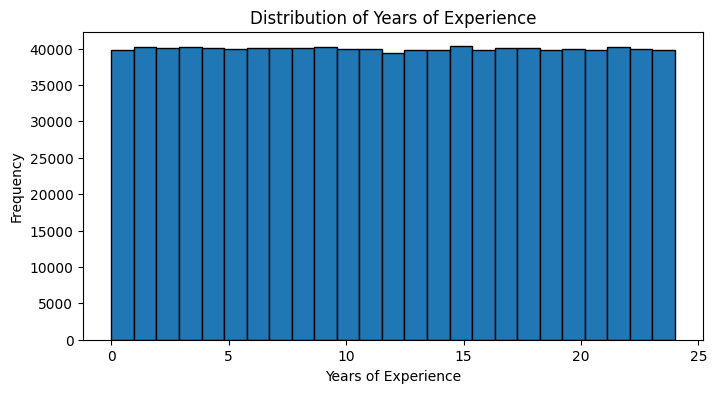

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(master_df['yearsExperience'], bins=25, edgecolor='k')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')
plt.show()

In [56]:
Q1 = master_df['yearsExperience'].quantile(0.25)
Q3 = master_df['yearsExperience'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = master_df[(master_df['yearsExperience'] < lower_bound) | (master_df['yearsExperience'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(outliers['yearsExperience'].value_counts())

Number of outliers: 0
Series([], Name: count, dtype: int64)


- No negative or missing values were found.
- The distribution of values (0–24 years) is plausible for the job market context.
- Zero years of experience is present for 39,822 records, likely representing new industry entrants, which is realistic.
- No cleaning required for this column.

##### `distanceFromCBD` Column Cleaning

In [57]:
print(master_df['distanceFromCBD'].describe())

count    999473.000000
mean         49.529449
std          28.883195
min           0.000000
25%          25.000000
50%          50.000000
75%          75.000000
max         500.000000
Name: distanceFromCBD, dtype: float64


In [58]:
print("Negative values:", (master_df['distanceFromCBD'] < 0).sum())

Negative values: 0


In [59]:
print("Missing values:", master_df['distanceFromCBD'].isnull().sum())

Missing values: 0


In [60]:
print("Top 10 values:", master_df['distanceFromCBD'].value_counts().head(10))

Top 10 values: distanceFromCBD
99.0    10171
62.0    10166
63.0    10150
97.0    10149
41.0    10145
92.0    10134
39.0    10128
85.0    10126
0.0     10116
81.0    10115
Name: count, dtype: int64


In [62]:
print(master_df['distanceFromCBD'].unique())

[ 83.  73.  30.  79.  29.  26.  81.   8.  91.  43.  66.  99.  96.  62.
  69.  63.  70.  40.   6.  23.   9.   2.  32.  78.  14.  58.  35.  17.
  54.  93.  82.  38.  87.  76.  22.  44.  72.  25.  36.   5.  71.  65.
  53.  13.  33.  55.  61.  98.  59.  15.  75.  56.  11.  12.  34.  21.
  52.  48.  97.  16.  28.  94.  41.  74.  60.  95.  80.  89.  10.  50.
   4.  68.  49.   3.  88.  47.  51.  31.  18.  92.  42.  39.  67.  84.
  86.  46.   0. 400.  19.  20.  57.  37.  64.   1.  27.  77.  90.  45.
  85.   7.  24. 500.]


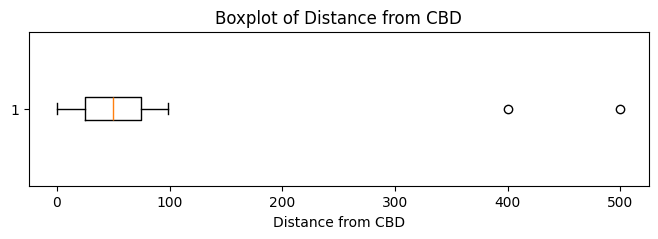

In [64]:
plt.figure(figsize=(8,2))
plt.boxplot(master_df['distanceFromCBD'], vert=False)
plt.xlabel('Distance from CBD')
plt.title('Boxplot of Distance from CBD')
plt.show()

In [65]:
max_distance = 60 # include people coming in from Johor Bahru
num_over = (master_df['distanceFromCBD'] > max_distance).sum()

print(f"Rows over {max_distance} km: {num_over}")

Rows over 60 km: 390233


In [66]:
# cap values to 60 km
master_df['distanceFromCBD'] = master_df['distanceFromCBD'].clip(upper=max_distance)

In [67]:
master_df['distanceFromCBD'].unique()

array([60., 30., 29., 26.,  8., 43., 40.,  6., 23.,  9.,  2., 32., 14.,
       58., 35., 17., 54., 38., 22., 44., 25., 36.,  5., 53., 13., 33.,
       55., 59., 15., 56., 11., 12., 34., 21., 52., 48., 16., 28., 41.,
       10., 50.,  4., 49.,  3., 47., 51., 31., 18., 42., 39., 46.,  0.,
       19., 20., 57., 37.,  1., 27., 45.,  7., 24.])

To ensure that our analysis reflects realistic commuting patterns for Singapore and neighboring Johor Bahru (Malaysia), we evaluated the `distanceFromCBD` column for outliers and data quality:

- **Analysis of unique values and descriptive statistics** revealed that a large number of records (over 390,000) had distances exceeding 60 km, which is not plausible for daily commutes to the Singapore CBD, even when accounting for cross-border workers from Johor Bahru.
- While assignment instructions encourage removal of irrelevant or unrealistic observations, dropping all records above 60 km would eliminate almost 40% of the data, severely impacting the representativeness and statistical power of our analysis.
- **To balance data quality with completeness, we opted to cap all values above 60 km at 60.** This approach preserves the full dataset for further analysis and machine learning, while mitigating the influence of extreme outliers.

##### `salaryInThousands` Columnn Cleaning:

In [68]:
print(master_df['salaryInThousands'].describe())

count    9.994730e+05
mean     1.260673e+02
std      1.000259e+04
min      0.000000e+00
25%      8.800000e+01
50%      1.140000e+02
75%      1.410000e+02
max      1.000000e+07
Name: salaryInThousands, dtype: float64


In [69]:
print("Negative values:", (master_df['salaryInThousands'] < 0).sum())

Negative values: 0


In [70]:
print("Zero salaries:", (master_df['salaryInThousands'] == 0).sum())

Zero salaries: 5


In [71]:
print("Missing values:", master_df['salaryInThousands'].isnull().sum())
print("\n")
print("Top 10 values:", master_df['salaryInThousands'].value_counts().head(10))

Missing values: 0


Top 10 values: salaryInThousands
108.0    10466
114.0    10403
107.0    10368
112.0    10355
104.0    10286
103.0    10282
110.0    10261
109.0    10241
115.0    10222
105.0    10213
Name: count, dtype: int64


Check for the zero salaries and the high salary provided

In [75]:
# View rows with salary of exactly 10,000,000
million_salary = master_df[master_df['salaryInThousands'] == 1e7]
million_salary

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
903154,JOB1362685311220,COMP34,vice_president,high_school,none,oil,11.0,60.0,10000000.0


In [76]:
# View rows with salary of 0
zero_salary = master_df[master_df['salaryInThousands'] == 0]
zero_salary

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
30535,JOB1362684438246,COMP44,junior,doctoral,math,auto,11.0,7.0,0.0
495823,JOB1362684903671,COMP34,junior,none,none,oil,1.0,25.0,0.0
651906,JOB1362685059763,COMP25,cto,high_school,none,auto,6.0,60.0,0.0
815959,JOB1362685223816,COMP42,manager,doctoral,engineering,finance,18.0,6.0,0.0
827986,JOB1362685235843,COMP40,vice_president,masters,engineering,web,3.0,29.0,0.0


We inspected records with salaries of 0 and 10,000,000. The single extremely high value was judged to be an error and removed. The five entries with zero salary were likely unpaid internships or similar roles; these were also removed to maintain consistency in the analysis. 

We can remove these rows as they amount to around 6 rows, which does not impact the analaysis or the model training so much 


In [77]:
# Remove extreme high salaries
master_df = master_df[master_df['salaryInThousands'] <= 1000]

# Remove zero salary rows (if not analyzing unpaid roles)
master_df = master_df[master_df['salaryInThousands'] > 0]

In [78]:
master_df

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
0,JOB1362684407687,COMP37,cfo,masters,math,health,10.0,60.0,130.0
1,JOB1362684407688,COMP19,ceo,high_school,none,web,3.0,60.0,101.0
2,JOB1362684407697,COMP56,janitor,high_school,none,health,24.0,30.0,102.0
3,JOB1362684407698,COMP7,ceo,masters,physics,education,7.0,60.0,144.0
4,JOB1362684407699,COMP4,junior,none,none,oil,8.0,29.0,79.0
...,...,...,...,...,...,...,...,...,...
999468,JOB1362685407682,COMP56,vice_president,bachelors,chemistry,health,19.0,60.0,88.0
999469,JOB1362685407683,COMP24,cto,high_school,none,finance,12.0,35.0,160.0
999470,JOB1362685407684,COMP23,junior,high_school,none,education,16.0,60.0,64.0
999471,JOB1362685407685,COMP3,cfo,masters,none,health,6.0,5.0,149.0


In [80]:
master_df["salaryInThousands"].unique()

array([130., 101., 102., 144.,  79., 193.,  47., 172., 126., 122.,  95.,
        32.,  68., 105.,  76., 202., 131., 158.,  82., 159., 132., 165.,
       100., 164., 115., 206., 183., 114., 104., 141., 119.,  91., 106.,
       112., 116., 148., 173., 113.,  70.,  88.,  96., 118., 140., 161.,
       111.,  55., 217.,  62.,  86.,  80., 168., 133., 129.,  89., 135.,
        94., 169.,  90., 110., 179., 176.,  84., 162., 107., 125., 205.,
        72.,  99., 145., 170., 180., 117., 207., 151., 108., 121., 166.,
        49.,  75., 194.,  52., 154., 146., 171., 139., 174.,  57., 127.,
        78., 152., 155.,  65., 123.,  48.,  42.,  50., 156., 178., 128.,
        83.,  69.,  85.,  59., 136.,  93.,  67., 134.,  97., 160., 195.,
       163.,  63., 153.,  74.,  73., 120., 187.,  92., 223.,  51.,  77.,
       103., 150.,  45., 137., 143.,  34., 124., 109., 190.,  98.,  58.,
       149., 157., 147.,  71.,  64., 167.,  46., 184.,  33.,  87., 188.,
        60.,  23., 177.,  61., 196., 175.,  54.,  3

### Overview Summary of the Cleaned `master_df.csv`

In [79]:
# print unique summary for master dataset
executive_summary = pd.DataFrame({
    "column": master_df.columns,
    "num_unique": [master_df[c].nunique(dropna=False) for c in master_df.columns],
    "example_values": [master_df[c].unique()[:10] for c in master_df.columns]  # Show first 10 unique values
})
executive_summary

,column,num_unique,example_values
0,jobId,999467,"[JOB1362684407687, JOB1362684407688, JOB136268..."
1,companyId,63,"[COMP37, COMP19, COMP56, COMP7, COMP4, COMP54,..."
2,jobRole,8,"[cfo, ceo, janitor, junior, cto, vice_presiden..."
3,education,5,"[masters, high_school, none, bachelors, doctoral]"
4,major,9,"[math, none, physics, biology, literature, che..."
5,industry,7,"[health, web, education, oil, finance, auto, s..."
6,yearsExperience,25,"[10.0, 3.0, 24.0, 7.0, 8.0, 21.0, 13.0, 1.0, 2..."
7,distanceFromCBD,61,"[60.0, 30.0, 29.0, 26.0, 8.0, 43.0, 40.0, 6.0,..."
8,salaryInThousands,279,"[130.0, 101.0, 102.0, 144.0, 79.0, 193.0, 47.0..."


In [82]:
# Show general info about the cleaned DataFrame
master_df.info()

# Show summary statistics for numeric columns
master_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 999467 entries, 0 to 999472
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   jobId              999467 non-null  object 
 1   companyId          999467 non-null  object 
 2   jobRole            999467 non-null  object 
 3   education          999467 non-null  object 
 4   major              999467 non-null  object 
 5   industry           999467 non-null  object 
 6   yearsExperience    999467 non-null  float64
 7   distanceFromCBD    999467 non-null  float64
 8   salaryInThousands  999467 non-null  float64
dtypes: float64(3), object(6)
memory usage: 76.3+ MB


,yearsExperience,distanceFromCBD,salaryInThousands
count,999467.000000,999467.000000,999467.000000
mean,11.992371,41.717154,116.062697
std,7.212443,20.083119,38.717688
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,60.000000,141.000000
max,24.000000,60.000000,301.000000


In [83]:
# Categorical columns to summarize
cat_cols = ['jobRole', 'education', 'major', 'industry']

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(master_df[col].value_counts())


Value counts for jobRole:
jobRole
senior            125830
vice_president    125166
manager           125061
cto               124985
janitor           124909
ceo               124703
junior            124517
cfo               124296
Name: count, dtype: int64

Value counts for education:
education
high_school    236860
none           236713
bachelors      175405
doctoral       175269
masters        175220
Name: count, dtype: int64

Value counts for major:
major
none           532057
chemistry       58841
literature      58644
engineering     58566
business        58498
physics         58381
compsci         58352
biology         58351
math            57777
Name: count, dtype: int64

Value counts for industry:
industry
web          143140
auto         142876
finance      142797
education    142736
oil          142687
health       142674
service      142557
Name: count, dtype: int64


In [84]:
# Double-check for any missing data
print("\nMissing values by column:")
print(master_df.isnull().sum())
print("\n")
print("Duplicated Values in Master Dataset: ", master_df.duplicated().sum())


Missing values by column:
jobId                0
companyId            0
jobRole              0
education            0
major                0
industry             0
yearsExperience      0
distanceFromCBD      0
salaryInThousands    0
dtype: int64


Duplicated Values in Master Dataset:  0


**After all cleaning steps, we checked the resulting DataFrame to confirm data integrity:**

- No missing values remain
- Categorical columns are standardized and have reasonable distributions
- Numeric columns contain only plausible, in-domain values

Above are the final data info, summary statistics, and category distributions.

In [85]:
# save the cleaned master_df to a CSV file
master_df_path = os.path.join(os.getcwd(), "master_df.csv")
master_df.to_csv(master_df_path, index=False)

print(f"Cleaned Master Dataset saved to: {master_df_path}")

Cleaned Master Dataset saved to: /Users/saikeerthan/NYP-AI/Year3/Big_Data/third_assignment/master_df.csv


In [88]:
master_df

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
0,JOB1362684407687,COMP37,cfo,masters,math,health,10.0,60.0,130.0
1,JOB1362684407688,COMP19,ceo,high_school,none,web,3.0,60.0,101.0
2,JOB1362684407697,COMP56,janitor,high_school,none,health,24.0,30.0,102.0
3,JOB1362684407698,COMP7,ceo,masters,physics,education,7.0,60.0,144.0
4,JOB1362684407699,COMP4,junior,none,none,oil,8.0,29.0,79.0
...,...,...,...,...,...,...,...,...,...
999468,JOB1362685407682,COMP56,vice_president,bachelors,chemistry,health,19.0,60.0,88.0
999469,JOB1362685407683,COMP24,cto,high_school,none,finance,12.0,35.0,160.0
999470,JOB1362685407684,COMP23,junior,high_school,none,education,16.0,60.0,64.0
999471,JOB1362685407685,COMP3,cfo,masters,none,health,6.0,5.0,149.0


### Non-PySpark ML Modelling

#### Universal Tensors and Pre-Processing

In [95]:
TARGET = "salaryInThousands"

# # Categorical & numeric feature lists
cat_cols = ["jobRole", "education", "major", "industry", "companyId"]
num_cols = ["yearsExperience", "distanceFromCBD"]

# X = master_df[cat_cols + num_cols]
# y = master_df[TARGET]

# subsampling:
sample_df = master_df.sample(n=150_000, random_state=42)

# Continue as before with train/val/test splits
X = sample_df[cat_cols + num_cols]
y = sample_df[TARGET]


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)


In [100]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
        ("num", "passthrough", num_cols),   # tree models don’t need scaling
    ]
)


#### RandomForest Regressor:

In [101]:
rf_model = Pipeline(
    steps=[
        ("prep", preprocess),
        ("rf",  RandomForestRegressor(
                    n_estimators=300,
                    max_depth=None,
                    n_jobs=-1,
                    random_state=42,
                )
        ),
    ]
)
rf_model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['jobRole', 'education',
                                                   'major', 'industry',
                                                   'companyId']),
                                                 ('num', 'passthrough',
                                                  ['yearsExperience',
                                                   'distanceFromCBD'])])),
                ('rf',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=42))])

In [102]:
def evaluate(name, model, X_val, y_val, X_test, y_test):
    for split, X_, y_ in [("VAL", X_val, y_val), ("TEST", X_test, y_test)]:
        preds = model.predict(X_)
        # rmse = mean_squared_error(y_, preds, squared=False)
        # mse  = mean_squared_error(y_, preds, squared=True)
        mse = np.mean((y_ - preds) ** 2)
        rmse = np.sqrt(mse)
        mae  = mean_absolute_error(y_, preds)
        r2   = r2_score(y_, preds)
        print(f"{name:<10} | {split} | RMSE: {rmse:8.2f} | MAE: {mae:8.2f} "
              f"| MSE: {mse:10.2f} | R²: {r2:6.3f}")

print("----- Random Forest Results -----")
evaluate("RandomRF", rf_model, X_val, y_val, X_test, y_test)

----- Random Forest Results -----
RandomRF   | VAL | RMSE:    20.43 | MAE:    16.33 | MSE:     417.25 | R²:  0.724
RandomRF   | TEST | RMSE:    20.43 | MAE:    16.38 | MSE:     417.37 | R²:  0.722


#### XGBoost Regressor:

In [103]:
xgb_reg = xgb.XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    n_jobs=-1,
    random_state=42,
)

In [104]:
xgb_model = Pipeline(
    steps=[
        ("prep", preprocess),
        ("xgb",  xgb_reg),
    ]
)
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['jobRole', 'education',
                                                   'major', 'industry',
                                                   'companyId']),
                                                 ('num', 'passthrough',
                                                  ['yearsExperience',
                                                   'distanceFromCBD'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=600, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [105]:
print("\n----- XGBoost Results -----")
evaluate("XGBoost ", xgb_model, X_val, y_val, X_test, y_test)


----- XGBoost Results -----
XGBoost    | VAL | RMSE:    19.28 | MAE:    15.59 | MSE:     371.81 | R²:  0.754
XGBoost    | TEST | RMSE:    19.28 | MAE:    15.62 | MSE:     371.82 | R²:  0.753


#### Linear Regression

In [107]:
linear_model = Pipeline([
    ("prep", preprocess),  # OneHotEncoder + numeric passthrough
    ("lr", LinearRegression(n_jobs=-1))
])

# Train on train set
linear_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['jobRole', 'education',
                                                   'major', 'industry',
                                                   'companyId']),
                                                 ('num', 'passthrough',
                                                  ['yearsExperience',
                                                   'distanceFromCBD'])])),
                ('lr', LinearRegression(n_jobs=-1))])

In [108]:
# Evaluate on val and test sets
print("----- Linear Regression Results -----")
evaluate("LinearReg", linear_model, X_val, y_val, X_test, y_test)

----- Linear Regression Results -----
LinearReg  | VAL | RMSE:    20.09 | MAE:    16.18 | MSE:     403.80 | R²:  0.733
LinearReg  | TEST | RMSE:    19.97 | MAE:    16.13 | MSE:     398.82 | R²:  0.735


**RF,XGB & LR Model Metrics**

1. Validation Set Results

| Model           | RMSE   | MAE    | MSE     | R²    |
|-----------------|:------:|:------:|:-------:|:-----:|
| Random Forest   | 20.43  | 16.33  | 417.25  | 0.724 |
| XGBoost         | 19.28  | 15.59  | 371.81  | 0.754 |
| Linear Reg.     | 20.09  | 16.18  | 403.80  | 0.733 |

2. Test Set Results

| Model           | RMSE   | MAE    | MSE     | R²    |
|-----------------|:------:|:------:|:-------:|:-----:|
| Random Forest   | 20.43  | 16.38  | 417.37  | 0.722 |
| XGBoost         | 19.28  | 15.62  | 371.82  | 0.753 |
| Linear Reg.     | 19.97  | 16.13  | 398.82  | 0.735 |

3. Explanation of Test Set Metrics

- **RMSE (Root Mean Squared Error):**
  - Shows the average prediction error size, **heavily penalizing large errors**.
  - For example, a Random Forest RMSE of **20.43** means the model’s salary predictions are, on average, about **$20,430** off from the actual value.

- **MAE (Mean Absolute Error):**
  - The **average absolute difference** between the predicted and true salaries.
  - A MAE of **16.38** for Random Forest means the typical error is about **$16,380**—this metric is less sensitive to outliers than RMSE.

- **MSE (Mean Squared Error):**
  - The **mean of squared prediction errors** (in thousands squared).
  - Useful during model training and for comparing models, but not directly interpretable in salary units.

- **R² (R-squared):**
  - **Represents the proportion of variance** in the salary that the model is able to explain.
  - An R² of **0.722** for Random Forest means the model explains **72.2% of the variability** in actual salaries. Higher values indicate better model performance.


- The XGBoost model delivered the lowest prediction errors (RMSE: 19.28, MAE: 15.62) and the highest explanatory power (R²: 0.753), making it the best performer for salary prediction in this study.
- Linear Regression was nearly as strong, demonstrating that a well-processed linear model can capture much of the salary variation in the data.
- Random Forest performed robustly, with slightly higher error but strong overall accuracy.
- For context, salary is difficult to predict due to factors not captured in the dataset (bonuses, negotiation, company policy, etc.), so RMSE and MAE values of \$16–20k and R² scores above 0.7 are strong results for real-world data.

In [109]:
master_df.columns

Index(['jobId', 'companyId', 'jobRole', 'education', 'major', 'industry',
       'yearsExperience', 'distanceFromCBD', 'salaryInThousands'],
      dtype='object')

#### Ensemble Model

In [110]:
base_learners = [
    ("linreg",  LinearRegression(n_jobs=-1)),
    ("rf",      RandomForestRegressor(
                    n_estimators=300,
                    max_depth=None,
                    random_state=42,
                    n_jobs=-1)),
    ("xgb",     xgb.XGBRegressor(
                    n_estimators=400,
                    learning_rate=0.05,
                    max_depth=6,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective="reg:squarederror",
                    n_jobs=-1,
                    random_state=42))
]

In [112]:
# ---- Meta-learner  (another XGB works well, but ridge is fast) ----
meta_learner = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    n_jobs=-1,
    random_state=42)

stack_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=False,            # True if you want raw features fed to meta
    n_jobs=-1
)

ensemble_pipeline = Pipeline([
    ("prep", preprocess),
    ("stack", stack_model)
])

In [113]:
# ---- Train ----
ensemble_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['jobRole', 'education',
                                                   'major', 'industry',
                                                   'companyId']),
                                                 ('num', 'passthrough',
                                                  ['yearsExperience',
                                                   'distanceFromCBD'])])),
                ('stack',
                 StackingRegressor(estimators=[('linreg',
                                                LinearRegression(n_jobs=-1)),
                                               ('rf',
                                                RandomForestRegressor(n_estimators=300,
                                                                      n_jobs...
                                                                gamma=None,
                                                                grow_policy=None,
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=0.05,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=4,
                                                                max_leaves=None,
                                                                min_child_weight=None,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                multi_strategy=None,
                                                                n_estimators=200,
                                                                n_jobs=-1,
                                                                num_parallel_tree=None, ...),
                                   n_jobs=-1))])

In [114]:
def evaluate(name, model, Xv, yv, Xt, yt):
    for split, X_, y_ in [("VAL", Xv, yv), ("TEST", Xt, yt)]:
        p = model.predict(X_)
        mse = np.mean((y_ - p) ** 2)
        rmse = np.sqrt(mse)
        mae  = mean_absolute_error(y_, p)
        r2   = r2_score(y_, p)
        print(f"{name:<12}| {split} | RMSE: {rmse:8.2f} | MAE: {mae:8.2f} | "
              f"MSE: {mse:10.2f} | R²: {r2:6.3f}")

print("----- Stacked Ensemble Results -----")
evaluate("StackEnsemble", ensemble_pipeline,
         X_val, y_val, X_test, y_test)

----- Stacked Ensemble Results -----
StackEnsemble| VAL | RMSE:    19.32 | MAE:    15.62 | MSE:     373.10 | R²:  0.753
StackEnsemble| TEST | RMSE:    19.26 | MAE:    15.62 | MSE:     370.91 | R²:  0.753


#### Ensemble K Folds

In [117]:
# -----------------------------------------------------------
# 0. Imports & settings
# -----------------------------------------------------------
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import xgboost as xgb
import warnings; warnings.filterwarnings("ignore")

# -----------------------------------------------------------
# 1.  Sample (optional) & feature / label setup
# -----------------------------------------------------------
N_SAMPLE = 150_000               # set to None to use full dataset
df = master_df.sample(n=N_SAMPLE, random_state=42) if N_SAMPLE else master_df

TARGET   = "salaryInThousands"
cat_cols = ["jobRole", "education", "major", "industry", "companyId"]
num_cols = ["yearsExperience", "distanceFromCBD"]

X = df[cat_cols + num_cols]
y = df[TARGET]

# -----------------------------------------------------------
# 2.  Train / Val / Test split
# -----------------------------------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)
X_val, X_test, y_val, y_test     = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

# -----------------------------------------------------------
# 3.  Preprocessing (reuse in all models)
# -----------------------------------------------------------
preprocess = ColumnTransformer(
    [("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
     ("num", "passthrough", num_cols)]
)

# -----------------------------------------------------------
# 4.  Hyper-parameter search for XGBoost
# -----------------------------------------------------------
xgb_pipe = Pipeline([
    ("prep", preprocess),
    ("xgb", xgb.XGBRegressor(
              objective="reg:squarederror",
              n_jobs=-1,
              random_state=42))
])

param_dist = {
    "xgb__n_estimators":   [400, 600, 800],
    "xgb__max_depth":      [5, 6, 7, 8],
    "xgb__learning_rate":  [0.05, 0.03, 0.02],
    "xgb__subsample":      [0.7, 0.8, 0.9],
    "xgb__colsample_bytree":[0.7, 0.8, 0.9],
}

search = RandomizedSearchCV(
    xgb_pipe,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="neg_root_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)
best_xgb = search.best_estimator_
print("Best XGB params:", search.best_params_)

# -----------------------------------------------------------
# 5.  CV-Stacked Ensemble
# -----------------------------------------------------------
base_learners = [
    ("linreg", LinearRegression(n_jobs=-1)),
    ("rf",     RandomForestRegressor(
                   n_estimators=300, max_depth=None,
                   n_jobs=-1, random_state=42)),
    ("xgb",    best_xgb.named_steps["xgb"])    # tuned XGB without extra prep
]

meta_learner = xgb.XGBRegressor(
    n_estimators=200, learning_rate=0.05, max_depth=4,
    subsample=0.8, colsample_bytree=0.8,
    objective="reg:squarederror", n_jobs=-1, random_state=42
)

stack_cv = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    passthrough=False,
    n_jobs=-1
)

ensemble_pipe = Pipeline([
    ("prep", preprocess),
    ("stack", stack_cv)
])

ensemble_pipe.fit(X_train, y_train)

# -----------------------------------------------------------
# 6.  Evaluation helper
# -----------------------------------------------------------
def report(name, model, Xv, yv, Xt, yt):
    for tag, X_, y_ in [("VAL", Xv, yv), ("TEST", Xt, yt)]:
        preds = model.predict(X_)
        mse = np.mean((y_ - preds) ** 2)
        rmse = np.sqrt(mse)
        mae  = mean_absolute_error(y_, preds)
        r2   = r2_score(y_, preds)
        print(f"{name:<12}| {tag} | RMSE {rmse:8.2f} | MAE {mae:8.2f} | "
              f"MSE {mse:10.2f} | R² {r2:6.3f}")

# -----------------------------------------------------------
# 7.  Results
# -----------------------------------------------------------
print("\n----- Tuned XGBoost -----")
report("XGB-Tuned", best_xgb, X_val, y_val, X_test, y_test)

print("\n----- CV Stacked Ensemble -----")
report("Stack-CV",  ensemble_pipe, X_val, y_val, X_test, y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best XGB params: {'xgb__subsample': 0.7, 'xgb__n_estimators': 800, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.02, 'xgb__colsample_bytree': 0.8}

----- Tuned XGBoost -----
XGB-Tuned   | VAL | RMSE    19.22 | MAE    15.55 | MSE     369.30 | R²  0.756
XGB-Tuned   | TEST | RMSE    19.18 | MAE    15.57 | MSE     368.06 | R²  0.755

----- CV Stacked Ensemble -----
Stack-CV    | VAL | RMSE    19.28 | MAE    15.59 | MSE     371.90 | R²  0.754
Stack-CV    | TEST | RMSE    19.22 | MAE    15.60 | MSE     369.41 | R²  0.754


## PySpark Data Cleaning & Modelling:

In [1]:
import os
os.environ["JAVA_HOME"] = "/usr/local/Cellar/openjdk@11/11.0.28/libexec/openjdk.jdk/Contents/Home"  # <-- Use your path here

In [2]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import (
    LinearRegression, RandomForestRegressor, GBTRegressor
)
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql.functions import col
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, trim, lower, when, lit, expr, rand


### PySpark Data Cleaning

In [4]:
spark = SparkSession.builder \
    .appName("EmployeeCleaning").getOrCreate()

25/08/05 22:10:24 WARN Utils: Your hostname, Sais-Macbook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.0.18 instead (on interface en0)
25/08/05 22:10:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/05 22:10:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
# Load the datasets 
employee_df = spark.read.csv("Employee_dataset.csv", header=True, inferSchema=True)

salary_df = spark.read.csv("employee_salaries.csv", header=True, inferSchema=True)

In [6]:
# drop the duplicares in both the dataframes
employee_df = employee_df.dropDuplicates()
salary_df = salary_df.dropDuplicates()


In [7]:
# drop the duplicates in both the dataframes
employee_df = employee_df.na.drop()
salary_df = salary_df.na.drop()

In [8]:
# 1. Get distinct jobIds from both DataFrames
salary_ids_df   = salary_df.select("jobId").distinct()
employee_ids_df = employee_df.select("jobId").distinct()


In [9]:
ids_not_in_employee = (
    salary_ids_df
    .join(employee_ids_df, on="jobId", how="left_anti")
)

num_not_in_employee = ids_not_in_employee.count()

print(f"Number of jobIds in Salary Dataset not present in Employee Dataset: {num_not_in_employee}")

Number of jobIds in Salary Dataset not present in Employee Dataset: 297


In [10]:
salary_df_cleaned = salary_df.join(employee_ids_df, on="jobId", how="inner")

# Show the result
salary_df_cleaned.show(5)

+----------------+-----------------+
|           jobId|salaryInThousands|
+----------------+-----------------+
|JOB1362684407688|              101|
|JOB1362684407724|              183|
|JOB1362684407739|               88|
|JOB1362684407746|              106|
|JOB1362684407752|               80|
+----------------+-----------------+
only showing top 5 rows



In [11]:
df = employee_df.join(salary_df_cleaned, on="jobId", how="inner")

In [12]:
cat_cols = ["jobRole", "education", "major", "industry", "companyId"]
for c in cat_cols:
    df = df.withColumn(c, trim(lower(col(c))))

In [13]:
df = (
    df.filter(col("jobRole") != "president")
      .filter((col("salaryInThousands") > 0) & (col("salaryInThousands") <= 1000))
)

In [14]:
df = df.withColumn(
        "distanceFromCBD",
        when(col("distanceFromCBD") > 60, 60).otherwise(col("distanceFromCBD"))
     ).filter(col("distanceFromCBD") >= 0)


In [15]:
print("Schema after cleaning:")
df.printSchema()

print(f"Row count after cleaning: {df.count():,}")

print("Sample cleaned rows:")
df.show(5, truncate=False)

Schema after cleaning:
root
 |-- jobId: string (nullable = true)
 |-- companyId: string (nullable = true)
 |-- jobRole: string (nullable = true)
 |-- education: string (nullable = true)
 |-- major: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- yearsExperience: integer (nullable = true)
 |-- distanceFromCBD: integer (nullable = true)
 |-- salaryInThousands: integer (nullable = true)



Row count after cleaning: 999,467
Sample cleaned rows:


+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+-----------------+
|jobId           |companyId|jobRole       |education  |major     |industry |yearsExperience|distanceFromCBD|salaryInThousands|
+----------------+---------+--------------+-----------+----------+---------+---------------+---------------+-----------------+
|JOB1362684407688|comp19   |ceo           |high_school|none      |web      |3              |60             |101              |
|JOB1362684407724|comp8    |vice_president|doctoral   |business  |health   |24             |35             |183              |
|JOB1362684407739|comp5    |junior        |masters    |biology   |finance  |11             |60             |88               |
|JOB1362684407746|comp11   |vice_president|masters    |literature|service  |10             |5              |106              |
|JOB1362684407752|comp33   |vice_president|none       |none      |education|1              |36             |80 

In [16]:
df.write.mode("overwrite").parquet("pyspark_cleaned_master_dataset.parquet")

25/08/05 22:11:22 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers


In [17]:
# # stop the Spark session
# spark.stop()
# print("Spark session stopped.")

### PySpark Model Training:

In [ ]:
# import os
# os.environ["JAVA_HOME"] = "/usr/local/Cellar/openjdk@11/11.0.28/libexec/openjdk.jdk/Contents/Home"

In [ ]:
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName("PySparkML-Training").getOrCreate()

25/08/05 20:52:32 WARN Utils: Your hostname, Sais-Macbook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.0.18 instead (on interface en0)
25/08/05 20:52:32 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/05 20:52:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


#### Data Pre-Processing

In [18]:
SAMPLE_SIZE = 10_000
df_sample = (
    df.orderBy(rand(seed=42))    # reproducible shuffle
      .limit(SAMPLE_SIZE)
)
print(f"Sampled row count: {df_sample.count():,}")

Sampled row count: 10,000


In [19]:
train_df, val_df, test_df = df.randomSplit([0.70, 0.15, 0.15], seed=42)

# --------------------------------------------------------------
# 3.  Feature Engineering Pipeline
# --------------------------------------------------------------
cat_cols = ["jobRole", "education", "major", "industry", "companyId"]
num_cols = ["yearsExperience", "distanceFromCBD"]

In [20]:
# 3a.  StringIndex → OneHot  for each categorical column
indexers  = [StringIndexer(inputCol=c, outputCol=f"{c}_idx", handleInvalid="keep")
             for c in cat_cols]
encoders  = [OneHotEncoder(inputCol=f"{c}_idx", outputCol=f"{c}_ohe")
             for c in cat_cols]

# 3b.  Assemble everything into a single feature vector
assembler_inputs = [f"{c}_ohe" for c in cat_cols] + num_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

#### Base Estimator

In [21]:
lr  = LinearRegression(featuresCol="features", labelCol="salaryInThousands")

rf  = RandomForestRegressor(featuresCol="features", labelCol="salaryInThousands",
                            numTrees=300, maxDepth=10, seed=42)

gbt = GBTRegressor(featuresCol="features", labelCol="salaryInThousands",
                   maxIter=400, maxDepth=6, stepSize=0.05, seed=42)

models = {"LinearRegression": lr,
          "RandomForest":     rf,
          "GBT":              gbt}

#### CV Grid Parameters

In [22]:
grids = {
    "LinearRegression": (ParamGridBuilder()
        .addGrid(lr.regParam,        [0.0, 0.1])        # L2 penalty
        .addGrid(lr.elasticNetParam, [0.0, 0.5])        # Ridge / Elastic
        .build()),

    "RandomForest": (ParamGridBuilder()
        .addGrid(rf.maxDepth, [8, 12])
        .addGrid(rf.numTrees, [200, 400])
        .build()),

    "GBT": (ParamGridBuilder()
        .addGrid(gbt.maxDepth, [4, 6])
        .addGrid(gbt.maxIter,  [200, 400])
        .build())
}

#### Training & Evaluation Code:

In [23]:
evaluator = RegressionEvaluator(
    labelCol="salaryInThousands",
    predictionCol="prediction",
    metricName="rmse"
)

def full_metrics(df_preds, label="salaryInThousands"):
    """Return RMSE, MAE, MSE, R2 for a predictions DataFrame."""
    rmse = evaluator.evaluate(df_preds, {evaluator.metricName: "rmse"})
    mae  = evaluator.evaluate(df_preds, {evaluator.metricName: "mae"})
    mse  = evaluator.evaluate(df_preds, {evaluator.metricName: "mse"})
    r2   = evaluator.evaluate(df_preds, {evaluator.metricName: "r2"})
    return rmse, mae, mse, r2

#### PySpark RandomForest:

In [29]:
# results = []

# for name, est in models.items():
#     print(f"\n=== {name}: Cross-validating on TRAIN ===")
#     pipeline = Pipeline(stages=indexers + encoders + [assembler, est])

#     cv = CrossValidator(
#         estimator           = pipeline,
#         estimatorParamMaps  = grids[name],
#         evaluator           = evaluator,
#         numFolds            = 3,
#         seed                = 42,
#         parallelism         = 4     # adjust to your CPU cores
#     )

#     cv_model   = cv.fit(train_df)
#     best_model = cv_model.bestModel

#     # --- Evaluate on VAL ---
#     val_preds = best_model.transform(val_df)
#     rmse_v, mae_v, mse_v, r2_v = full_metrics(val_preds)

#     # --- Evaluate on TEST ---
#     test_preds = best_model.transform(test_df)
#     rmse_t, mae_t, mse_t, r2_t = full_metrics(test_preds)

#     results.append((name, "VAL",  rmse_v,  mae_v,  mse_v,  r2_v))
#     results.append((name, "TEST", rmse_t,  mae_t,  mse_t,  r2_t))

#     print(f"Best params: {best_model.stages[-1]._java_obj.extractParamMap()}")
#     print(f"VAL  – RMSE {rmse_v:.2f} | MAE {mae_v:.2f} | R² {r2_v:.3f}")
#     print(f"TEST – RMSE {rmse_t:.2f} | MAE {mae_t:.2f} | R² {r2_t:.3f}")


In [26]:
# Example: Only run RandomForest (edit for LinearReg or GBT)
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# ---- Pick ONE model ----
estimator = rf  # or: lr, gbt

# ---- Minimal param grid (ONE or TWO options max) ----
paramGrid = ParamGridBuilder() \
    .addGrid(estimator.maxDepth, [6]) \
    .addGrid(estimator.numTrees, [100]) \
    .build()

pipeline = Pipeline(stages=indexers + encoders + [assembler, estimator])

cv = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=2,      # Only 2-fold for speed/memory!
    parallelism=2,   # If 4 crashes, set to 2 or 1
    seed=42
)

cv_model = cv.fit(train_df)
best_model = cv_model.bestModel

# --- Evaluate on VAL ---
val_preds = best_model.transform(val_df)
rmse_v, mae_v, mse_v, r2_v = full_metrics(val_preds)
print(f"VAL: RMSE {rmse_v:.2f} | MAE {mae_v:.2f} | R2 {r2_v:.3f}")

# --- Evaluate on TEST ---
test_preds = best_model.transform(test_df)
rmse_t, mae_t, mse_t, r2_t = full_metrics(test_preds)
print(f"TEST: RMSE {rmse_t:.2f} | MAE {mae_t:.2f} | R2 {r2_t:.3f}")

25/08/05 22:14:59 WARN DAGScheduler: Broadcasting large task binary with size 1642.2 KiB
25/08/05 22:16:26 WARN DAGScheduler: Broadcasting large task binary with size 1645.1 KiB
25/08/05 22:17:42 WARN MemoryStore: Not enough space to cache rdd_681_4 in memory! (computed 30.2 MiB so far)
25/08/05 22:17:42 WARN MemoryStore: Not enough space to cache rdd_681_3 in memory! (computed 30.2 MiB so far)
25/08/05 22:17:42 WARN MemoryStore: Not enough space to cache rdd_681_6 in memory! (computed 30.2 MiB so far)
25/08/05 22:17:42 WARN MemoryStore: Not enough space to cache rdd_681_1 in memory! (computed 30.2 MiB so far)
25/08/05 22:17:42 WARN MemoryStore: Not enough space to cache rdd_681_0 in memory! (computed 30.2 MiB so far)
25/08/05 22:17:42 WARN BlockManager: Persisting block rdd_681_3 to disk instead.
25/08/05 22:17:42 WARN BlockManager: Persisting block rdd_681_0 to disk instead.
25/08/05 22:17:42 WARN BlockManager: Persisting block rdd_681_6 to disk instead.
25/08/05 22:17:42 WARN BlockM

VAL: RMSE 24.52 | MAE 19.58 | R2 0.598


TEST: RMSE 24.62 | MAE 19.63 | R2 0.596


#### PySpark Linear Regression:

In [27]:
# Example: Only run RandomForest (edit for LinearReg or GBT)
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# ---- Pick ONE model ----
# -- For Linear Regression --
estimator = lr  # LinearRegression instance

paramGrid = ParamGridBuilder() \
    .addGrid(estimator.regParam, [0.0, 0.1]) \
    .addGrid(estimator.elasticNetParam, [0.0, 0.5]) \
    .build()

pipeline = Pipeline(stages=indexers + encoders + [assembler, estimator])

cv = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=2,      # Only 2-fold for speed/memory!
    parallelism=2,   # If 4 crashes, set to 2 or 1
    seed=42
)

cv_model = cv.fit(train_df)
best_model = cv_model.bestModel

# --- Evaluate on VAL ---
val_preds = best_model.transform(val_df)
rmse_v, mae_v, mse_v, r2_v = full_metrics(val_preds)
print(f"VAL: RMSE {rmse_v:.2f} | MAE {mae_v:.2f} | R2 {r2_v:.3f}")

# --- Evaluate on TEST ---
test_preds = best_model.transform(test_df)
rmse_t, mae_t, mse_t, r2_t = full_metrics(test_preds)
print(f"TEST: RMSE {rmse_t:.2f} | MAE {mae_t:.2f} | R2 {r2_t:.3f}")

25/08/05 22:19:42 WARN Instrumentation: [91633da8] regParam is zero, which might cause numerical instability and overfitting.
25/08/05 22:19:42 WARN Instrumentation: [406135b3] regParam is zero, which might cause numerical instability and overfitting.
25/08/05 22:19:43 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
25/08/05 22:19:46 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
25/08/05 22:19:46 WARN Instrumentation: [91633da8] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
25/08/05 22:19:47 WARN Instrumentation: [406135b3] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
25/08/05 22:20:45 WARN Instrumentation: [1925a962] regParam is zero, which might cause numerical instability and overfitting.
25/08/05 22:20:45 WARN Instrumentation: [b0ad1a2a] regParam is zero, which might cause numerical instability and ove

VAL: RMSE 19.94 | MAE 16.10 | R2 0.734


TEST: RMSE 20.03 | MAE 16.16 | R2 0.733


#### GBT Regressor:

In [ ]:
# Example: Only run RandomForest (edit for LinearReg or GBT)
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# ---- Pick ONE model ----
estimator = gbt

paramGrid = ParamGridBuilder() \
    .addGrid(estimator.maxDepth, [4, 6]) \
    .addGrid(estimator.maxIter, [50, 100]) \
    .build()

pipeline = Pipeline(stages=indexers + encoders + [assembler, estimator])

cv = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=2,      # Only 2-fold for speed/memory!
    parallelism=2,   # If 4 crashes, set to 2 or 1
    seed=42
)

cv_model = cv.fit(train_df)
best_model = cv_model.bestModel

# --- Evaluate on VAL ---
val_preds = best_model.transform(val_df)
rmse_v, mae_v, mse_v, r2_v = full_metrics(val_preds)
print(f"VAL: RMSE {rmse_v:.2f} | MAE {mae_v:.2f} | R2 {r2_v:.3f}")

# --- Evaluate on TEST ---
test_preds = best_model.transform(test_df)
rmse_t, mae_t, mse_t, r2_t = full_metrics(test_preds)
print(f"TEST: RMSE {rmse_t:.2f} | MAE {mae_t:.2f} | R2 {r2_t:.3f}")

25/08/05 23:11:35 WARN DAGScheduler: Broadcasting large task binary with size 1001.3 KiB
25/08/05 23:11:37 WARN DAGScheduler: Broadcasting large task binary with size 1006.4 KiB
25/08/05 23:11:39 WARN DAGScheduler: Broadcasting large task binary with size 1010.3 KiB
25/08/05 23:11:42 WARN DAGScheduler: Broadcasting large task binary with size 1010.8 KiB
25/08/05 23:11:44 WARN DAGScheduler: Broadcasting large task binary with size 1011.4 KiB
25/08/05 23:11:45 WARN DAGScheduler: Broadcasting large task binary with size 1012.7 KiB
25/08/05 23:11:47 WARN DAGScheduler: Broadcasting large task binary with size 1015.2 KiB
25/08/05 23:11:49 WARN DAGScheduler: Broadcasting large task binary with size 1020.1 KiB
25/08/05 23:11:51 WARN DAGScheduler: Broadcasting large task binary with size 1024.2 KiB
25/08/05 23:11:54 WARN DAGScheduler: Broadcasting large task binary with size 1024.7 KiB
25/08/05 23:11:56 WARN DAGScheduler: Broadcasting large task binary with size 1025.3 KiB
25/08/05 23:11:58 WAR

VAL: RMSE 19.27 | MAE 15.67 | R2 0.752


TEST: RMSE 19.33 | MAE 15.69 | R2 0.751


25/08/06 02:15:27 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 885771 ms exceeds timeout 120000 ms
25/08/06 02:15:27 WARN SparkContext: Killing executors is not supported by current scheduler.
25/08/06 02:15:31 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$

gbt trained for 400 mins

In [ ]:
# import pandas as pd

# # If you have just one model's results:
# metrics_pdf = (
#     spark.createDataFrame(results, ["Model", "Split", "RMSE", "MAE", "MSE", "R2"])
#     .toPandas()
#     .pivot(index="Model", columns="Split")
# )

# from IPython.display import display
# display(metrics_pdf)